Foi utilizado durante o experimento o software Qucs com o apoio da linguagem Python para análise de dados. 


In [153]:
#Importando bibliotecas para análise de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Questão 2
Importação dos dados e processamento sobre a curva referente ao modelo do capacitor de 4.7 pF:

In [154]:
df = pd.read_csv('dados/Grafico Potência.csv',sep=';')
#Organizando Dados
df1 = df[['r Pin']]
df2 = df[['i Pin']]
xx = df1.to_numpy()
yy = df2.to_numpy()
df['Pin'] = np.sqrt((xx**2)+(yy**2))
#Analisando forma de onda:
df = df[['acfrequency','Pin']]
#Visualização da organização de dados
df.head()

,acfrequency,Pin
0,1000000.0,0.00003
1,1002310.0,0.00003
2,1004620.0,0.00003
3,1006930.0,0.00003
4,1009250.0,0.00003


Análise gráfica da potência transferida no modelo pela frequência:

Text(0.5, 1.0, 'Potência no Modelo')

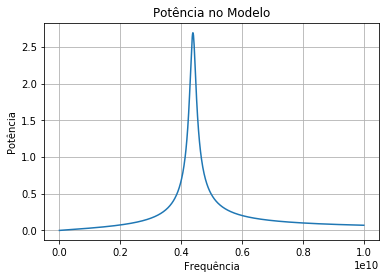

In [155]:
dfx = df[['acfrequency']]
dfy = df[['Pin']]
freq = dfx.to_numpy()
pot = dfy.to_numpy()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,pot)
ax.set_xlabel('Frequência')
ax.set_ylabel('Potência')
ax.set_title('Potência no Modelo')

Foi determinado a frequencia de auto-ressonância a partir da frequência onde possui a maior potência transferida.
podemos observar que foi encontrado em Fr = 4.385310 GHz, que condiz com o teórico calculado no Pré lab de 4.39GHz.

In [156]:
sort = df.sort_values(by = 'Pin',ascending=False)
sortf = sort.iloc[0]
#Extraindo fr
fr = float(sortf[['acfrequency']].to_numpy())
#Extraindo a potencia de relação
prel = float(sortf[['Pin']].to_numpy())
sort = sort[['acfrequency','Pin']]
sort.iloc[0]

acfrequency    4.385310e+09
Pin            2.694236e+00
Name: 3642, dtype: float64

Como segundo métdo vamos utilizar a análise das impedância, para validar o valor encontrado anteriormente e determinandr o fator Q e a tangente de perdas:

In [157]:
data = pd.read_csv('dados/zmodelo.csv',sep=';')
#Visualização da organização de dados
data.head()

,acfrequency,r Zin,i Zin
0,1.000000e+09,0.3711,-32.1035
1,1.002310e+09,0.3711,-32.0215
2,1.004620e+09,0.3711,-31.9398
3,1.006930e+09,0.3711,-31.8582
4,1.009250e+09,0.3711,-31.7767


Análise Gráfica da impedância:

<Figure size 432x288 with 0 Axes>

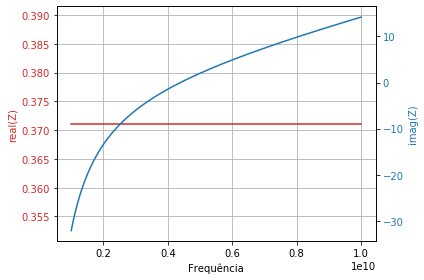

In [158]:
freq1 = data[['acfrequency']]
yr = data[['r Zin']]
yi= data[['i Zin']]
freq = freq1.to_numpy()
real = yr.to_numpy()
imag = yi.to_numpy()

fig = plt.figure()
fig, ax1 = plt.subplots()
ax.grid(True)

color = 'tab:red'
ax1.set_xlabel('Frequência')
ax1.set_ylabel('real(Z)', color=color)
ax1.plot(freq, real, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('imag(Z)', color=color) 
ax2.plot(freq, imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
fig.tight_layout() 
plt.show()

A seguir utilizaremos a seguinte equação para determinar o fator de qualidade(Q)
$$  Q =  \frac{imag \big\{Z\big\} }{ real \big\{Z\big\} } $$

Text(0.5, 1.0, 'Fator de Qualiade')

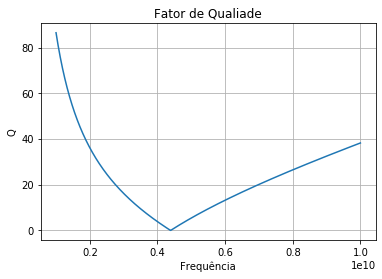

In [159]:
q = abs(imag)/abs(real)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,q)
ax.set_xlabel('Frequência')
ax.set_ylabel('Q')
ax.set_title('Fator de Qualiade')

Encontrando a frequência de auto-ressonância com mais precisão, comprovando que o valor de fr encontrado pela outra equação é válido

In [160]:
data['Q'] = abs(imag)/abs(real)
sortdata = data.sort_values(by = 'Q',ascending=True)
sortdata =  sortdata[['acfrequency','Q']]
sortf1 = sortdata.iloc[0]
#Extraindo Q
Qinit = float(sortf1[['Q']].to_numpy())
sortdata.iloc[0]

acfrequency    4.385310e+09
Q              1.840808e-02
Name: 642, dtype: float64

E a seguir sua tangente de perdas:

Text(0.5, 1.0, 'Tangente de perdas')

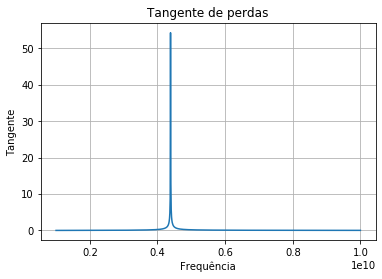

In [161]:
tang = 1/q

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,tang)
ax.set_xlabel('Frequência')
ax.set_ylabel('Tangente')
ax.set_title('Tangente de perdas')

## Questão 3
Na terceira parte do experimento vamos analizar o efeito da tolerância pela simulção Monte Carlo, primeiramente a importação sobre os dados da curva obtido desta simulação:

In [162]:
#Importando dados da curva:
dft = pd.read_csv('dados/tolerancia.csv',sep=';')
df1 = dft[['r Pin']]
df2 = dft[['i Pin']]
xx = df1.to_numpy()
yy = df2.to_numpy()
dft['Pin'] = np.sqrt((xx**2)+(yy**2))
dft = dft[['acfrequency','Pin']]
dft.head()

,acfrequency,Pin
0,1000000.0,0.00003
1,1002310.0,0.00003
2,1004620.0,0.00003
3,1006930.0,0.00003
4,1009250.0,0.00003


Análise gráfica gerada pelos dados obtidos:

Text(0.5, 1.0, 'Potência no Modelo')

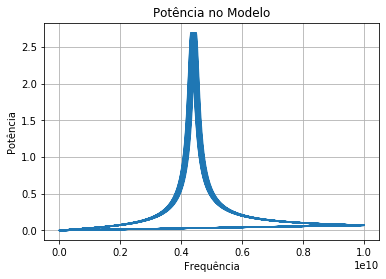

In [163]:
dfx = dft[['acfrequency']]
dfy = dft[['Pin']]
freq = dfx.to_numpy()
pot = dfy.to_numpy()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(freq,pot)
ax.grid(True)
ax.set_xlabel('Frequência')
ax.set_ylabel('Potência')
ax.set_title('Potência no Modelo')

Observamos a seguir que há uma pequena mudança na frequencia de auto-ressonãncia, para 4.42GHz:

In [164]:
sortt = dft.sort_values(by = 'Pin',ascending=False)
sortf1 = sortt.iloc[0]
sortt = sortt[['acfrequency','Pin']]
pmax1 = float(sortf1[['Pin']].to_numpy())
sortt.iloc[0]

acfrequency    4.415700e+09
Pin            2.694692e+00
Name: 15648, dtype: float64

A seguir a análise pelo método das impedâncias:

In [165]:
data1 = pd.read_csv('dados/zmonte.csv',sep=';')
#Visualização da organização de dados
data1.head()


,acfrequency,number,r Zin,i Zin
0,1.000000e+09,1,0.3711,-32.1035
1,1.002310e+09,1,0.3711,-32.0215
2,1.004620e+09,1,0.3711,-31.9398
3,1.006930e+09,1,0.3711,-31.8582
4,1.009250e+09,1,0.3711,-31.7767


<Figure size 432x288 with 0 Axes>

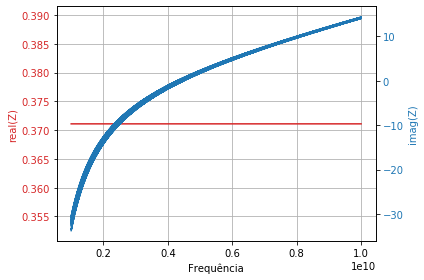

In [166]:
#Filtragem de pontos, para retirar dados discrepantes da simulção Monte Carlo
data_pandas = data1.sort_values(by='i Zin')
tamanho = len(data_pandas)
primeiro_quatil = data_pandas.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
primeiro_quatil = primeiro_quatil[['i Zin']].to_numpy()
terceiro_quartil = data_pandas.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')
inicio = round(int(tamanho / primeiro_quatil))
final = int(tamanho - abs(inicio))
linha_inicio = data_pandas.loc[abs(inicio)]
linha_inicio = linha_inicio[['i Zin']].to_numpy()
linha_final = data_pandas.loc[final]
linha_final = linha_final[['i Zin']].to_numpy()
menor = (int(linha_final - linha_inicio) * 1.5) - inicio
maior = (int(linha_final - linha_inicio) * 1.5) + final
data_pandas[(data_pandas['i Zin'] < menor)]
data_pandas[(data_pandas['i Zin'] > maior)]
#Retirando dados para o gráfico
freq1 = data_pandas[['acfrequency']]
yr = data_pandas[['r Zin']]
yi= data_pandas[['i Zin']]
freq = freq1.to_numpy()
real = yr.to_numpy()
imag = yi.to_numpy()

fig = plt.figure()
fig, ax1 = plt.subplots()
ax.grid(True)

color = 'tab:red'
ax1.set_xlabel('Frequência')
ax1.set_ylabel('real(Z)', color=color)
ax1.plot(freq, real, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('imag(Z)', color=color) 
ax2.plot(freq, imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
fig.tight_layout() 
plt.show()

Determinando o gráfico do fator Q

Text(0.5, 1.0, 'Fator de Qualiade')

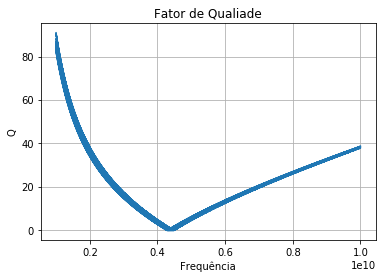

In [167]:
q1 = abs(imag)/abs(real)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,q1)
ax.set_xlabel('Frequência')
ax.set_ylabel('Q')
ax.set_title('Fator de Qualiade')

Temos a frequêcia de de auto-ressonância em 4.48 GHz considerando essa abordagem: 

In [168]:
data_pandas['Q'] = q1
sortdata1 = data_pandas.sort_values(by = 'Q',ascending=True)
sortdata1 =  sortdata1[['acfrequency','Q']]
sortdata1.iloc[0]

acfrequency    4.477130e+09
Q              1.035123e-03
Name: 18669, dtype: float64

E determinando a Tangente de Perdas:

Text(0.5, 1.0, 'Tangente de perdas')

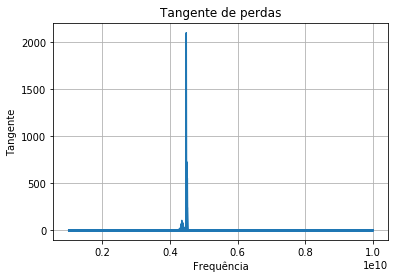

In [169]:
data2 = pd.read_csv('dados/tangente.csv',sep=';')
df1 = data2[['r tang']]
df2 = data2[['i tang']]
xx = df1.to_numpy()
yy = df2.to_numpy()
data2['Tng'] = np.sqrt((xx**2)+(yy**2))
data2 = data2[['acfrequency','Tng']]

freq1 = data2[['acfrequency']]
y = data2[['Tng']]
freq = freq1.to_numpy()
tg = y.to_numpy()


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq1,tg)
ax.set_xlabel('Frequência')
ax.set_ylabel('Tangente')
ax.set_title('Tangente de perdas')

Histograma da freqência de auto-ressonância, para o ponto de inflexão.

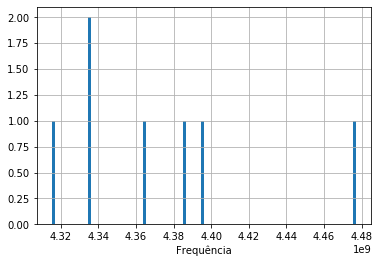

In [170]:
#Retirando dados com os limites obtidos
mask1 = data_pandas['Q'] <= Qinit
sortx = data_pandas.loc[mask1]
freqs = sortx['acfrequency']
freqx = sortx['acfrequency'].to_numpy()

plt.hist(freqx, bins = 100)
plt.xlabel('Frequência')
plt.grid(True)

Análise estatística dos dados nos histogramas:

In [171]:
freqs.describe()

count    7.000000e+00
mean     4.372633e+09
std      5.442284e+07
min      4.315190e+09
25%      4.335110e+09
50%      4.365160e+09
75%      4.390365e+09
max      4.477130e+09
Name: acfrequency, dtype: float64

Observando seu dados estatísticos, vemos uma variação de 4.31GHz a 4.48GHz com um desvio padrão de 54.42 MHz em torno de sua mediana de 4.37GHz, que inclui a freqência determinada anteriormente, sem a inclusão da tolerância. Observamos que ao incluir a tolerância temos uma maior densidade de frequências perto de de 4.34GHz

## Questão 4
Nesta ultima parte do experimento analisaremos o filtro passa-baixa proposto anteriormente e os efitos de incluir a tolerância sobre ele, num primeiro momento sobre o filtro com o capacitor ideal:

In [172]:
dfz = pd.read_csv('dados/filtrosemtol.csv',sep=';')
df1 = dfz[['r Ganho']]
df2 = dfz[['i Ganho']]
xx = df1.to_numpy()
yy = df2.to_numpy()
dfz['Ganho'] = np.sqrt((xx**2)+(yy**2))
dfz = dfz[['acfrequency','Ganho']]
dfz.head()

,acfrequency,Ganho
0,1000000.0,1.0
1,1002310.0,1.0
2,1004620.0,1.0
3,1006930.0,1.0
4,1009250.0,1.0


A seguir a resposta do filtro sem considerar a tolerância, para melhor visualização:

Text(0.5, 1.0, 'Resposta do Filtro')

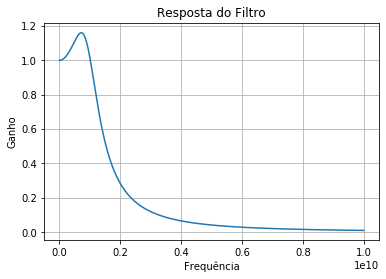

In [173]:
dfx1 = dfz[['acfrequency']]
dfy1 = dfz[['Ganho']]
freq1 = dfx1.to_numpy()
ganho = dfy1.to_numpy()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(freq1,ganho)
ax.grid(True)
ax.set_xlabel('Frequência')
ax.set_ylabel('Ganho')
ax.set_title('Resposta do Filtro')


A seguir a análise pelo métododas impedâncias, considerando o modelo do capacitor, sem o efeito das tolerâncias, descrito na questão 3:

In [174]:
data2 = pd.read_csv('dados/filtromodelo.csv',sep=';')
#Visualização da organização de dados
data2.head()

,acfrequency,r Z,i Z
0,1.000000e+09,16.0415,16.5478
1,1.002310e+09,15.9990,16.6271
2,1.004620e+09,15.9564,16.7067
3,1.006930e+09,15.9138,16.7866
4,1.009250e+09,15.8713,16.8668


Análise Gráfica dos dados:

<Figure size 432x288 with 0 Axes>

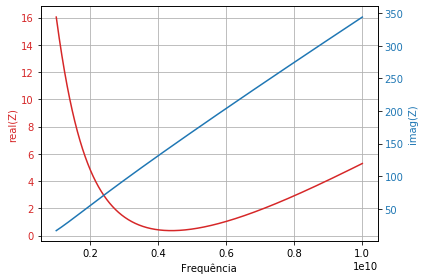

In [175]:
freq1 = data2[['acfrequency']]
yr = data2[['r Z']]
yi= data2[['i Z']]
freq = freq1.to_numpy()
real = yr.to_numpy()
imag = yi.to_numpy()

fig = plt.figure()
fig, ax1 = plt.subplots()
ax.grid(True)

color = 'tab:red'
ax1.set_xlabel('Frequência')
ax1.set_ylabel('real(Z)', color=color)
ax1.plot(freq, real, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('imag(Z)', color=color) 
ax2.plot(freq, imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
fig.tight_layout() 
plt.show()

Determinando o fator Q:

Text(0.5, 1.0, 'Fator de Qualiade')

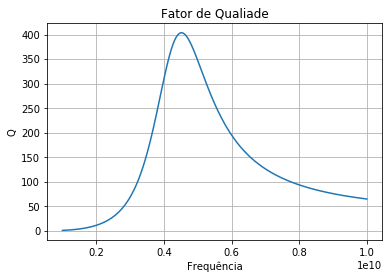

In [176]:
q = abs(imag)/abs(real)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,q)
ax.set_xlabel('Frequência')
ax.set_ylabel('Q')
ax.set_title('Fator de Qualiade')

A seguir a determinação da frequência de auto-ressonância, de 4.52 GHz:

In [177]:
data2['Q'] = q
sortdata = data2.sort_values(by = 'Q',ascending=False)
sortdata =  sortdata[['acfrequency','Q']]
sortf1 = sortdata.iloc[0]
#Extraindo Q
Qinit1 = float(sortf1[['Q']].to_numpy())
sortdata.iloc[0]

acfrequency    4.518560e+09
Q              4.037613e+02
Name: 655, dtype: float64

A seguir sua tangente de perdas:

Text(0.5, 1.0, 'Tangente de perdas')

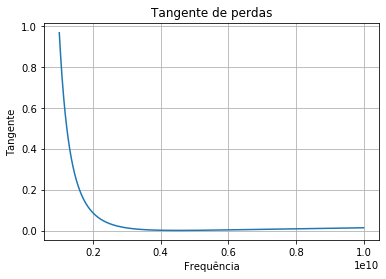

In [178]:
tang = 1/q

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,tang)
ax.set_xlabel('Frequência')
ax.set_ylabel('Tangente')
ax.set_title('Tangente de perdas')

Vamos analizar o filtro utilizando o modelo real e considerando a tolerância no capacitor:

In [179]:
data3 = pd.read_csv('dados/zfiltro.csv',sep=';')
#Visualização da organização de dados
data3.head()


,acfrequency,number,r Z,i Z
0,1.000000e+09,1,16.0415,16.5478
1,1.002310e+09,1,15.9990,16.6271
2,1.004620e+09,1,15.9564,16.7067
3,1.006930e+09,1,15.9138,16.7866
4,1.009250e+09,1,15.8713,16.8668


Análise gráfica do filtro:

<Figure size 432x288 with 0 Axes>

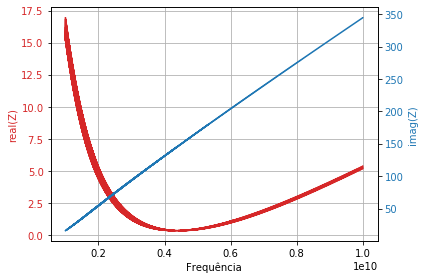

In [180]:
#Filtragem de pontos, para retirar dados discrepantes da simulção Monte Carlo
data_pandas = data3.sort_values(by='i Z')
tamanho = len(data_pandas)
primeiro_quatil = data_pandas.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
primeiro_quatil = primeiro_quatil[['i Z']].to_numpy()
terceiro_quartil = data_pandas.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')
inicio = round(int(tamanho / primeiro_quatil))
final = int(tamanho - abs(inicio))
linha_inicio = data_pandas.loc[abs(inicio)]
linha_inicio = linha_inicio[['i Z']].to_numpy()
linha_final = data_pandas.loc[final]
linha_final = linha_final[['i Z']].to_numpy()
menor = (int(linha_final - linha_inicio) * 1.5) - inicio
maior = (int(linha_final - linha_inicio) * 1.5) + final
data_pandas[(data_pandas['i Z'] < menor)]
data_pandas[(data_pandas['i Z'] > maior)]

#Retirando dados para o gráfico

freq1 = data_pandas[['acfrequency']]
yr = data_pandas[['r Z']]
yi= data_pandas[['i Z']]
freq = freq1.to_numpy()
real = yr.to_numpy()
imag = yi.to_numpy()

fig = plt.figure()
fig, ax1 = plt.subplots()
ax.grid(True)

color = 'tab:red'
ax1.set_xlabel('Frequência')
ax1.set_ylabel('real(Z)', color=color)
ax1.plot(freq, real, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('imag(Z)', color=color) 
ax2.plot(freq, imag, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
fig.tight_layout() 
plt.show()

Determinado o Fator Q:

Text(0.5, 1.0, 'Fator de Qualiade')

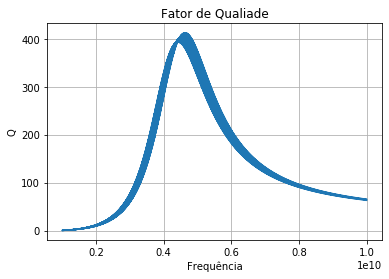

In [181]:
q = abs(imag)/abs(real)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,q)
ax.set_xlabel('Frequência')
ax.set_ylabel('Q')
ax.set_title('Fator de Qualiade')

A seguir a determinação de Fr, de 4.63GHz :

In [182]:
data_pandas['Q'] = q
sortdata = data_pandas.sort_values(by = 'Q',ascending=False)
sortdata =  sortdata[['acfrequency','Q']]
sortf1 = sortdata.iloc[0]
#Extraindo Q
Qmax1 = float(sortf1[['Q']].to_numpy())
sortdata.iloc[0]

acfrequency    4.634470e+09
Q              4.139452e+02
Name: 34700, dtype: float64

A seguir sua tangente de perdas:

Text(0.5, 1.0, 'Tangente de perdas')

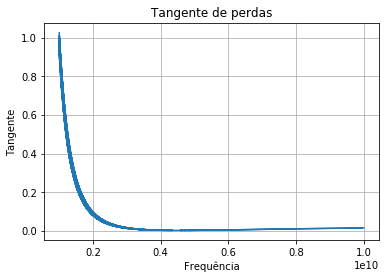

In [183]:
tang = 1/q

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.plot(freq,tang)
ax.set_xlabel('Frequência')
ax.set_ylabel('Tangente')
ax.set_title('Tangente de perdas')



Temos a seguir o histograma da frequência sobre estes dados, considerando a tolerança do capacitor:

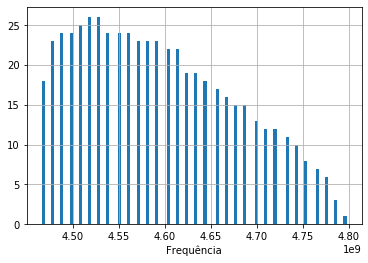

In [184]:

mask1 = data_pandas['Q'] <= Qinit1
sortx = data_pandas.loc[~mask1]
freqs = sortx['acfrequency']
freqx = sortx['acfrequency'].to_numpy()

plt.hist(freqx, bins = 100)
plt.xlabel('Frequência')
plt.grid(True)

Análise estatística dos dados nos histogramas:

In [185]:
freqs.describe()

count    5.530000e+02
mean     4.593390e+09
std      8.378125e+07
min      4.466840e+09
25%      4.518560e+09
50%      4.581420e+09
75%      4.655860e+09
max      4.797330e+09
Name: acfrequency, dtype: float64

Podemos observar uma varição de 4.46 GHz á 4.80GHz ao incluir a tolerância do capacitor, um desvio padrão d 83.87MHz em torno de sua media de 5.59 GHz, observamos que a maioria das frequências estão sobre o ponto de 4.52GHz que era a frequência de auto-ressonância determinada anteriormente sem incuir a tolerância.